## Flight Price Prediction

## Problem Statement:

## Importing the required libraries:

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [234]:
df = pd.read_csv("flights_df_final.csv")

In [235]:
df.drop("Unnamed: 0",axis =1,inplace = True) #dropping the duplicate row column

In [236]:
df.head()

,Airline,Date,Source City,Destination City,Departure Time,Arrival Time,Duration,Stops,Price
0,Go First,09-10-2021,New Delhi,Bangalore,19:45,22:20,2h 35m,Non Stop,"7,424"
1,Go First,09-10-2021,New Delhi,Bangalore,22:45,07:45\n+ 1 day,9h 00m,1 Stop,"7,424"
2,Vistara,09-10-2021,New Delhi,Bangalore,20:40,23:20,2h 40m,Non Stop,"7,425"
3,SpiceJet,09-10-2021,New Delhi,Bangalore,21:50,00:35\n+ 1 day,2h 45m,Non Stop,"7,425"
4,IndiGo,09-10-2021,New Delhi,Bangalore,22:20,01:05\n+ 1 day,2h 45m,Non Stop,"7,425"


In [237]:
df.shape

(2736, 9)

## EDA (Exploratory Data Analysis)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2736 non-null   object
 1   Date              2736 non-null   object
 2   Source City       2736 non-null   object
 3   Destination City  2736 non-null   object
 4   Departure Time    2736 non-null   object
 5   Arrival Time      2736 non-null   object
 6   Duration          2736 non-null   object
 7   Stops             2736 non-null   object
 8   Price             2736 non-null   object
dtypes: object(9)
memory usage: 192.5+ KB


In [239]:
df.shape

(2736, 9)

Now we have 2736 rows and 9 columns

In [240]:
df.columns

Index(['Airline', 'Date', 'Source City', 'Destination City', 'Departure Time',
       'Arrival Time', 'Duration', 'Stops', 'Price'],
      dtype='object')

In [241]:
df.dtypes

Airline             object
Date                object
Source City         object
Destination City    object
Departure Time      object
Arrival Time        object
Duration            object
Stops               object
Price               object
dtype: object

In [242]:
#lets check for null values
df.isnull().sum()

Airline             0
Date                0
Source City         0
Destination City    0
Departure Time      0
Arrival Time        0
Duration            0
Stops               0
Price               0
dtype: int64

In [243]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

Airline 6
Date 23
Source City 2
Destination City 3
Departure Time 173
Arrival Time 229
Duration 223
Stops 4
Price 215


In [244]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print('\n')
        print(i,df[i].value_counts())



Airline IndiGo       793
Vistara      557
Go First     414
Air Asia     373
SpiceJet     334
Air India    265
Name: Airline, dtype: int64


Date 20-10-2021    195
17-10-2021    195
12-10-2021    195
16-10-2021    195
10-10-2021    185
14-10-2021    155
21-10-2021    130
18-10-2021    130
28-10-2021    130
29-10-2021    130
11-10-2021    130
25-10-2021    130
24-10-2021    130
13-10-2021    130
22-10-2021     65
30-10-2021     65
26-10-2021     65
23-10-2021     65
31-10-2021     65
15-10-2021     65
19-10-2021     65
27-10-2021     65
09-10-2021     56
Name: Date, dtype: int64


Source City New Delhi    1620
Mumbai       1116
Name: Source City, dtype: int64


Destination City Mumbai       1129
Kolkata      1116
Bangalore     491
Name: Destination City, dtype: int64


Departure Time 08:00    67
17:45    55
19:45    50
22:45    49
07:30    47
         ..
06:30     1
22:30     1
16:30     1
08:35     1
10:30     1
Name: Departure Time, Length: 173, dtype: int64


Arrival Time 21:30     

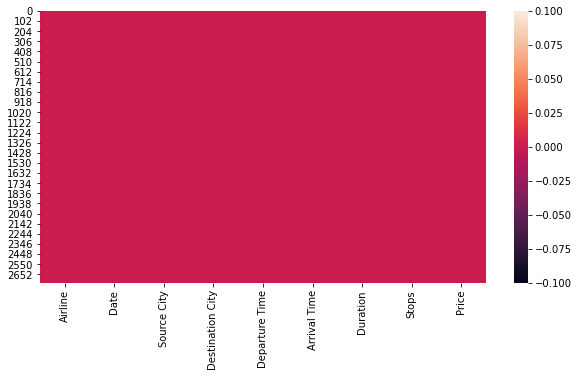

In [245]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

## Data Preprocessing

In [246]:
df['Dates'] =  pd.to_datetime(df['Date'],format="%d-%m-%Y")  #converting to date datatype

In [247]:
pd.DatetimeIndex(df['Dates']).month.unique()

Int64Index([10], dtype='int64', name='Dates')

In [248]:
#Dropping the old date column
df.drop("Date",axis =1 ,inplace = True)

In [249]:
df.head()

,Airline,Source City,Destination City,Departure Time,Arrival Time,Duration,Stops,Price,Dates
0,Go First,New Delhi,Bangalore,19:45,22:20,2h 35m,Non Stop,"7,424",2021-10-09
1,Go First,New Delhi,Bangalore,22:45,07:45\n+ 1 day,9h 00m,1 Stop,"7,424",2021-10-09
2,Vistara,New Delhi,Bangalore,20:40,23:20,2h 40m,Non Stop,"7,425",2021-10-09
3,SpiceJet,New Delhi,Bangalore,21:50,00:35\n+ 1 day,2h 45m,Non Stop,"7,425",2021-10-09
4,IndiGo,New Delhi,Bangalore,22:20,01:05\n+ 1 day,2h 45m,Non Stop,"7,425",2021-10-09


In [250]:
#converting price to float
df['Price']= df.Price.str.replace(",","")

In [251]:
#lets convert the price to float datatype
df['Price']= df['Price'].astype("float64")

In [252]:
df.dtypes

Airline                     object
Source City                 object
Destination City            object
Departure Time              object
Arrival Time                object
Duration                    object
Stops                       object
Price                      float64
Dates               datetime64[ns]
dtype: object

In [253]:
#Converting duration columns to minutes 

def minutes(x):
    hour, minute = x.split("h")
    minutes = (60 * int(hour)) + int(minute.strip("m"))
    return float(minutes)

In [254]:
#applying the above function
df['Duration_in_Minutes'] = df.Duration.apply(minutes)

In [255]:
#dropping the old column
df.drop("Duration",axis = 1,inplace= True)

In [256]:
df.dtypes

Airline                        object
Source City                    object
Destination City               object
Departure Time                 object
Arrival Time                   object
Stops                          object
Price                         float64
Dates                  datetime64[ns]
Duration_in_Minutes           float64
dtype: object

In [257]:
def next_day(x):
    if "\n" in x:
        return "Yes"
    else:
        return "No"

In [258]:
#creating a new column using the existing information 
#if flight reaches the destination next day i.e after 12 am
df["Next_day_Arrival"] = df["Arrival Time"].apply(next_day)

In [259]:
df.head()

,Airline,Source City,Destination City,Departure Time,Arrival Time,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival
0,Go First,New Delhi,Bangalore,19:45,22:20,Non Stop,7424.0,2021-10-09,155.0,No
1,Go First,New Delhi,Bangalore,22:45,07:45\n+ 1 day,1 Stop,7424.0,2021-10-09,540.0,Yes
2,Vistara,New Delhi,Bangalore,20:40,23:20,Non Stop,7425.0,2021-10-09,160.0,No
3,SpiceJet,New Delhi,Bangalore,21:50,00:35\n+ 1 day,Non Stop,7425.0,2021-10-09,165.0,Yes
4,IndiGo,New Delhi,Bangalore,22:20,01:05\n+ 1 day,Non Stop,7425.0,2021-10-09,165.0,Yes


In [260]:
import re
def Arrival(x):
    a = re.search(r"\d\d:\d\d",x)
    return a.group()

In [261]:

#removing the "\n+1 day" from arrival date
df["Arrival_Time"] = df["Arrival Time"].apply(Arrival)

In [262]:
#dropping the old column
df.drop("Arrival Time",axis = 1,inplace = True)
df.head()

,Airline,Source City,Destination City,Departure Time,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival,Arrival_Time
0,Go First,New Delhi,Bangalore,19:45,Non Stop,7424.0,2021-10-09,155.0,No,22:20
1,Go First,New Delhi,Bangalore,22:45,1 Stop,7424.0,2021-10-09,540.0,Yes,07:45
2,Vistara,New Delhi,Bangalore,20:40,Non Stop,7425.0,2021-10-09,160.0,No,23:20
3,SpiceJet,New Delhi,Bangalore,21:50,Non Stop,7425.0,2021-10-09,165.0,Yes,00:35
4,IndiGo,New Delhi,Bangalore,22:20,Non Stop,7425.0,2021-10-09,165.0,Yes,01:05


In [263]:
#lets extract the departure hour from deaprture time column
df["Depature_hour"] = pd.to_datetime(df["Departure Time"])
df["Depature_hour"] = pd.DatetimeIndex(df['Depature_hour']).hour

In [264]:
#lets extract the Arrival hour from Arrival time column
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"])
df["Arrival_hour"] = pd.DatetimeIndex(df['Arrival_hour']).hour

In [265]:
df.head()

,Airline,Source City,Destination City,Departure Time,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival,Arrival_Time,Depature_hour,Arrival_hour
0,Go First,New Delhi,Bangalore,19:45,Non Stop,7424.0,2021-10-09,155.0,No,22:20,19,22
1,Go First,New Delhi,Bangalore,22:45,1 Stop,7424.0,2021-10-09,540.0,Yes,07:45,22,7
2,Vistara,New Delhi,Bangalore,20:40,Non Stop,7425.0,2021-10-09,160.0,No,23:20,20,23
3,SpiceJet,New Delhi,Bangalore,21:50,Non Stop,7425.0,2021-10-09,165.0,Yes,00:35,21,0
4,IndiGo,New Delhi,Bangalore,22:20,Non Stop,7425.0,2021-10-09,165.0,Yes,01:05,22,1


In [266]:
#now lets drop Arrival_time and deapture time
df.drop(["Arrival_Time","Departure Time"],axis =1, inplace = True)

In [267]:
df.head()

,Airline,Source City,Destination City,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival,Depature_hour,Arrival_hour
0,Go First,New Delhi,Bangalore,Non Stop,7424.0,2021-10-09,155.0,No,19,22
1,Go First,New Delhi,Bangalore,1 Stop,7424.0,2021-10-09,540.0,Yes,22,7
2,Vistara,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,160.0,No,20,23
3,SpiceJet,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,21,0
4,IndiGo,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,22,1


In [268]:
#lets extract the time of the day from this column Dep_hour and Arrival_hour column
#lets write a function for this
def part_of_the_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [269]:
#applying the above fuction to get part of the day column
df['Departure_Part_of_the_day'] = df.Depature_hour.apply(part_of_the_day)

In [270]:
#applying the above fuction to get part of the day column
df['Arrival_Part_of_the_day'] = df.Arrival_hour.apply(part_of_the_day)

In [271]:
df.head()

,Airline,Source City,Destination City,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival,Depature_hour,Arrival_hour,Departure_Part_of_the_day,Arrival_Part_of_the_day
0,Go First,New Delhi,Bangalore,Non Stop,7424.0,2021-10-09,155.0,No,19,22,Eve,Night
1,Go First,New Delhi,Bangalore,1 Stop,7424.0,2021-10-09,540.0,Yes,22,7,Night,Early Morning
2,Vistara,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,160.0,No,20,23,Eve,Night
3,SpiceJet,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,21,0,Night,Late Night
4,IndiGo,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,22,1,Night,Late Night


In [272]:
#now lets drop Arrival_hour and deapture_hour
df.drop(["Arrival_hour","Depature_hour"],axis =1, inplace = True)

In [273]:
df.head()

,Airline,Source City,Destination City,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival,Departure_Part_of_the_day,Arrival_Part_of_the_day
0,Go First,New Delhi,Bangalore,Non Stop,7424.0,2021-10-09,155.0,No,Eve,Night
1,Go First,New Delhi,Bangalore,1 Stop,7424.0,2021-10-09,540.0,Yes,Night,Early Morning
2,Vistara,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,160.0,No,Eve,Night
3,SpiceJet,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,Night,Late Night
4,IndiGo,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,Night,Late Night


In [274]:

#exatrcting week number
df["week_num"] = pd.DatetimeIndex(df["Dates"]).weekday

In [275]:
#from Dates column we can extarct day and days prior to booking

def day(x):
    if x == 0:
        return "Monday"
    elif x == 1:
        return "Tuesday"
    elif x == 2:
        return "Wednesday"
    elif x == 3:
        return "Thursday"
    elif x == 4:
        return "Friday"
    elif x == 5:
        return "Saturday"
    elif x == 6:
        return "Sunday"

In [276]:
#extracting the day of the week
df["Day"] = df["week_num"].apply(day)

In [277]:
df.head()

,Airline,Source City,Destination City,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival,Departure_Part_of_the_day,Arrival_Part_of_the_day,week_num,Day
0,Go First,New Delhi,Bangalore,Non Stop,7424.0,2021-10-09,155.0,No,Eve,Night,5,Saturday
1,Go First,New Delhi,Bangalore,1 Stop,7424.0,2021-10-09,540.0,Yes,Night,Early Morning,5,Saturday
2,Vistara,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,160.0,No,Eve,Night,5,Saturday
3,SpiceJet,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,Night,Late Night,5,Saturday
4,IndiGo,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,Night,Late Night,5,Saturday


In [278]:
#exatracting only date since i have only scraped data from october 9th to october 31th 2021
df["only_date"] = pd.DatetimeIndex(df["Dates"]).day

In [279]:
#extraxting the days prior to booking column
#since i scapred the data on 9th
#for 9th days prior booking is zero
df["Days_priors_booking"] = df["only_date"] - 9

In [280]:
df.head()

,Airline,Source City,Destination City,Stops,Price,Dates,Duration_in_Minutes,Next_day_Arrival,Departure_Part_of_the_day,Arrival_Part_of_the_day,week_num,Day,only_date,Days_priors_booking
0,Go First,New Delhi,Bangalore,Non Stop,7424.0,2021-10-09,155.0,No,Eve,Night,5,Saturday,9,0
1,Go First,New Delhi,Bangalore,1 Stop,7424.0,2021-10-09,540.0,Yes,Night,Early Morning,5,Saturday,9,0
2,Vistara,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,160.0,No,Eve,Night,5,Saturday,9,0
3,SpiceJet,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,Night,Late Night,5,Saturday,9,0
4,IndiGo,New Delhi,Bangalore,Non Stop,7425.0,2021-10-09,165.0,Yes,Night,Late Night,5,Saturday,9,0


In [281]:
#Now lets drop week_num,only_date,Dates columns
df.drop(["Dates","week_num","only_date"],axis =1,inplace= True)

In [282]:
df.head()

,Airline,Source City,Destination City,Stops,Price,Duration_in_Minutes,Next_day_Arrival,Departure_Part_of_the_day,Arrival_Part_of_the_day,Day,Days_priors_booking
0,Go First,New Delhi,Bangalore,Non Stop,7424.0,155.0,No,Eve,Night,Saturday,0
1,Go First,New Delhi,Bangalore,1 Stop,7424.0,540.0,Yes,Night,Early Morning,Saturday,0
2,Vistara,New Delhi,Bangalore,Non Stop,7425.0,160.0,No,Eve,Night,Saturday,0
3,SpiceJet,New Delhi,Bangalore,Non Stop,7425.0,165.0,Yes,Night,Late Night,Saturday,0
4,IndiGo,New Delhi,Bangalore,Non Stop,7425.0,165.0,Yes,Night,Late Night,Saturday,0


In [283]:
#This is Our final Dataframe after pre-Processing

In [284]:
#df.to_csv("Flights_final_pre.csv")

In [285]:
df

,Airline,Source City,Destination City,Stops,Price,Duration_in_Minutes,Next_day_Arrival,Departure_Part_of_the_day,Arrival_Part_of_the_day,Day,Days_priors_booking
0,Go First,New Delhi,Bangalore,Non Stop,7424.0,155.0,No,Eve,Night,Saturday,0
1,Go First,New Delhi,Bangalore,1 Stop,7424.0,540.0,Yes,Night,Early Morning,Saturday,0
2,Vistara,New Delhi,Bangalore,Non Stop,7425.0,160.0,No,Eve,Night,Saturday,0
3,SpiceJet,New Delhi,Bangalore,Non Stop,7425.0,165.0,Yes,Night,Late Night,Saturday,0
4,IndiGo,New Delhi,Bangalore,Non Stop,7425.0,165.0,Yes,Night,Late Night,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...
2731,SpiceJet,New Delhi,Mumbai,1 Stop,6271.0,1310.0,Yes,Noon,Morning,Sunday,22
2732,IndiGo,New Delhi,Mumbai,1 Stop,6443.0,470.0,No,Morning,Eve,Sunday,22
2733,IndiGo,New Delhi,Mumbai,1 Stop,6443.0,610.0,Yes,Night,Early Morning,Sunday,22
2734,IndiGo,New Delhi,Mumbai,1 Stop,6506.0,320.0,No,Eve,Night,Sunday,22


## Data Visualization :

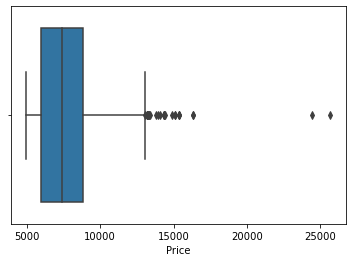

In [286]:
#lets check the box plot of our target column, to check if there are outliers
sns.boxplot(df.Price)
plt.show()

From the above plot we can see there are many outliers in the target column

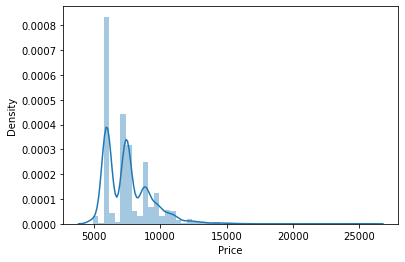

In [287]:
#lets check the distribution of the target column
sns.distplot(df.Price)
plt.show()

From the above plot we can see that data is right skewed in target column

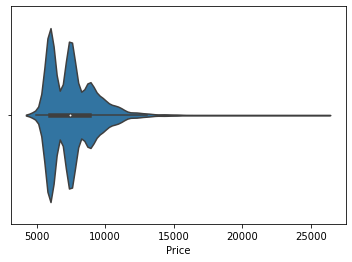

In [288]:
sns.violinplot(df.Price)
plt.show()

## Bivariate Analysis with Target Variable

In [289]:
df.columns

Index(['Airline', 'Source City', 'Destination City', 'Stops', 'Price',
       'Duration_in_Minutes', 'Next_day_Arrival', 'Departure_Part_of_the_day',
       'Arrival_Part_of_the_day', 'Day', 'Days_priors_booking'],
      dtype='object')

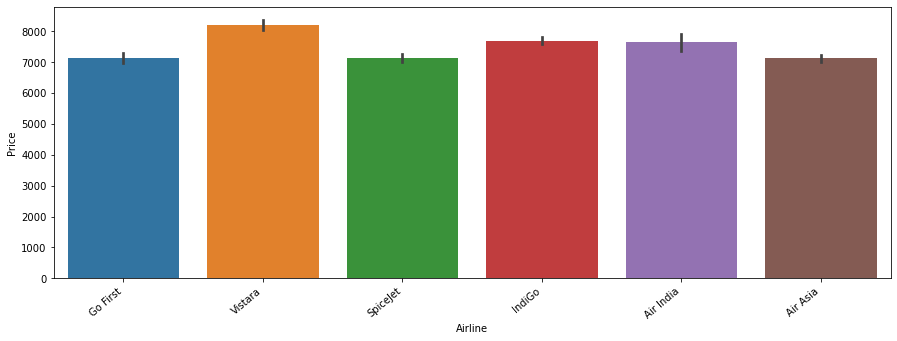

In [290]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Airline'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [348]:
#from the above plot we can see that spicejet is very cheap and vistara is more expensive

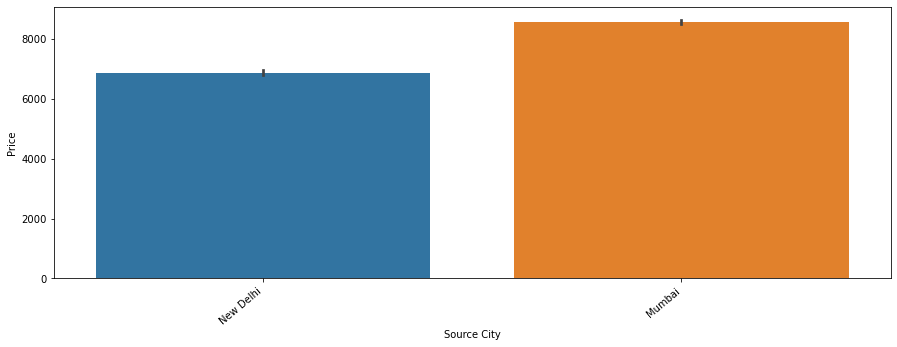

In [349]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Source City'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

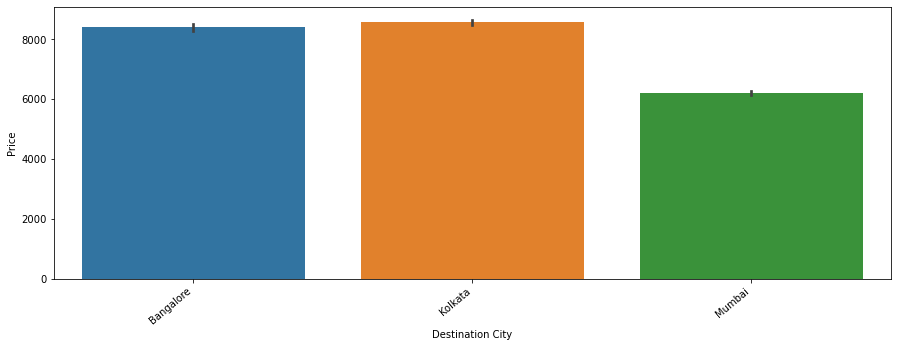

In [292]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Destination City'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

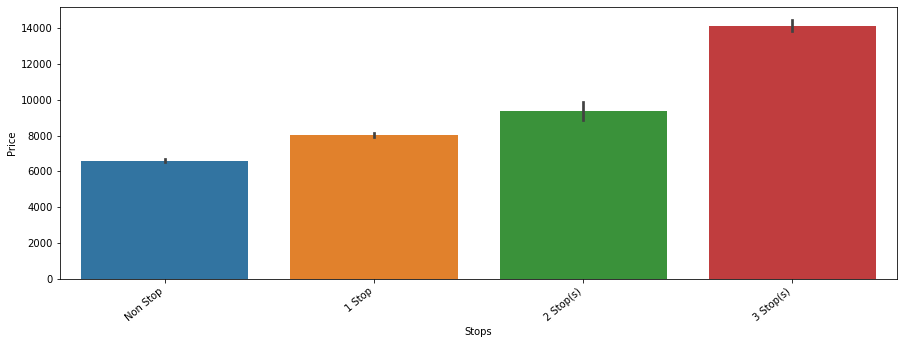

In [293]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Stops'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [350]:
#from the above plot we can see that flights having more spots are more expensive

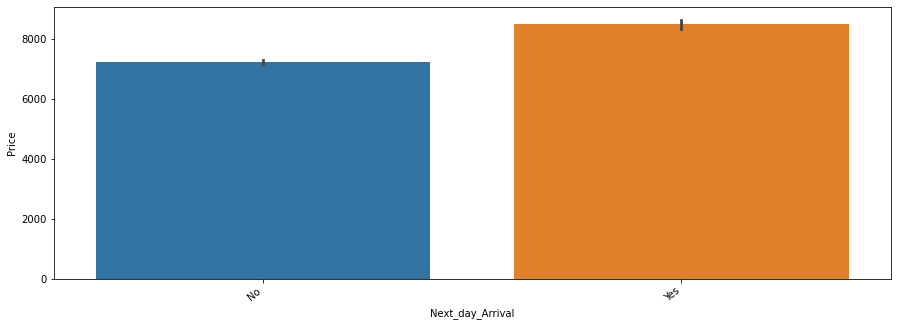

In [294]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Next_day_Arrival'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [351]:
#from the above plot we can see that if arrival is not in same day then the flight price is expensive

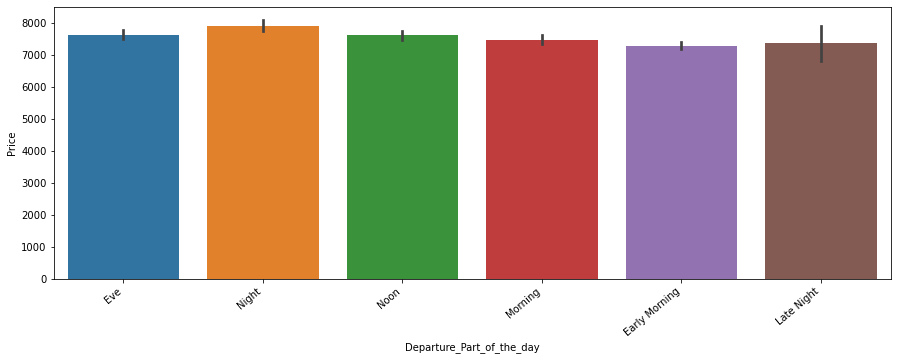

In [295]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Departure_Part_of_the_day'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [ ]:
#from the above plot we can see that we don't see much diffrence in entries

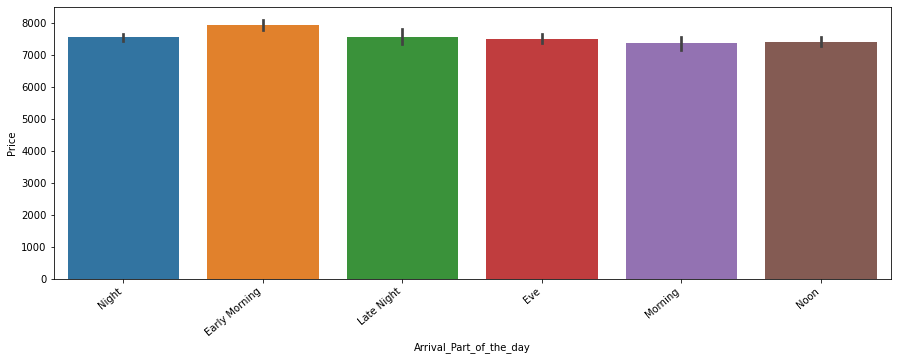

In [296]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Arrival_Part_of_the_day'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

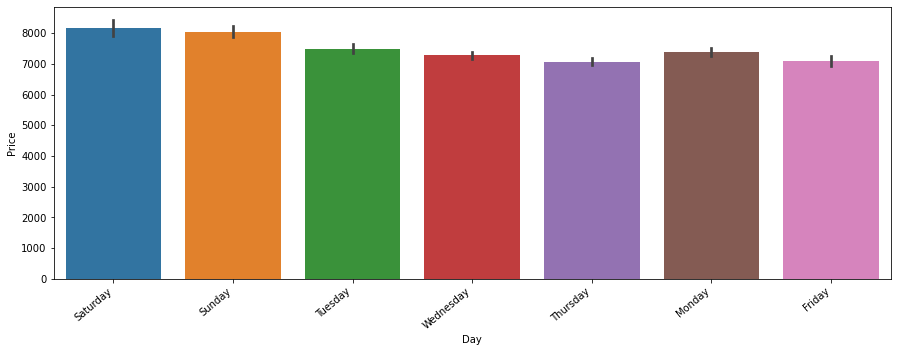

In [297]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Day'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [352]:
#from the above plot we can see that going thurday can save some money

In [298]:
df.columns

Index(['Airline', 'Source City', 'Destination City', 'Stops', 'Price',
       'Duration_in_Minutes', 'Next_day_Arrival', 'Departure_Part_of_the_day',
       'Arrival_Part_of_the_day', 'Day', 'Days_priors_booking'],
      dtype='object')

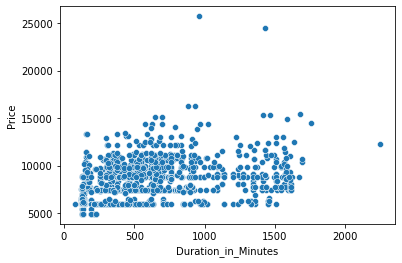

In [302]:
#Lets check this column againt our target variable
sns.scatterplot(x = 'Duration_in_Minutes', y ='Price' , data  = df)
plt.show()

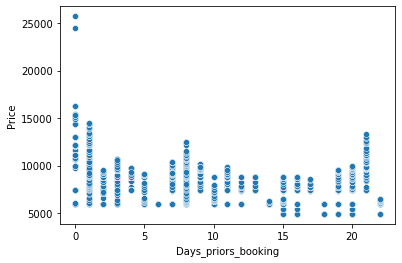

In [301]:
#Lets check this column againt our target variable
sns.scatterplot(x = 'Days_priors_booking', y ='Price' , data  = df)
plt.show()

## We have seven questions to answer our client

## 1. Do airfares change frequently?

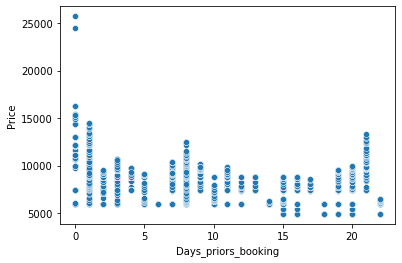

In [304]:
#Lets check this column againt our target variable
sns.scatterplot(x = 'Days_priors_booking', y ='Price' , data  = df)
plt.show()

From the above plot we can see that airfares change frequently

## 2. Do they move in small increments or in large jumps?

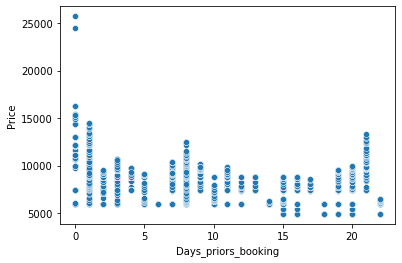

In [305]:
#Lets check this column againt our target variable
sns.scatterplot(x = 'Days_priors_booking', y ='Price' , data  = df)
plt.show()

Yes,they move in large jumps

## 3. Do they tend to go up or down over time?

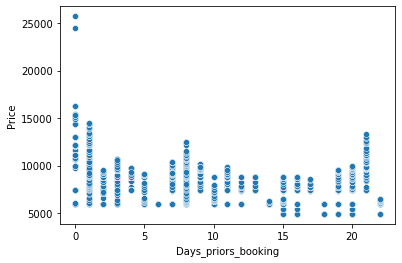

In [306]:
#Lets check this column againt our target variable
sns.scatterplot(x = 'Days_priors_booking', y ='Price' , data  = df)
plt.show()

They usally tend go down over time

## 4. What is the best time to buy so that the consumer can save the most by taking the least risk?

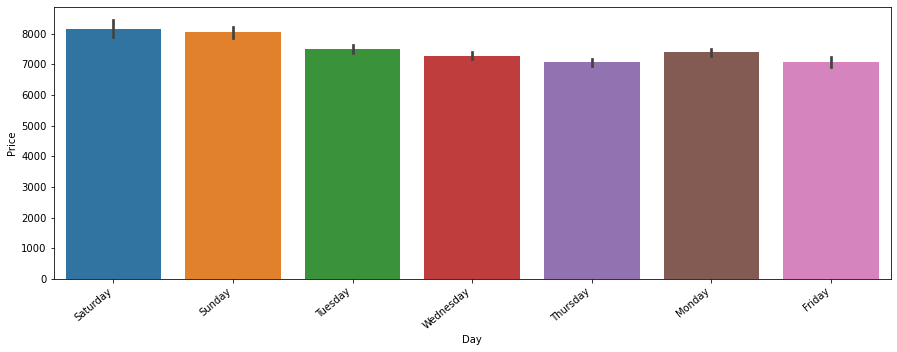

In [307]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Day'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

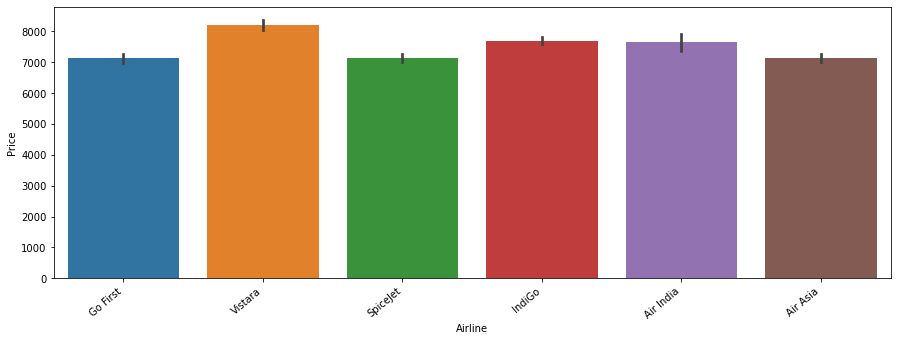

In [308]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Airline'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

Going on Thurday and choosinf spicejet can reduce the money

## 5. Does price increase as we get near to departure date?

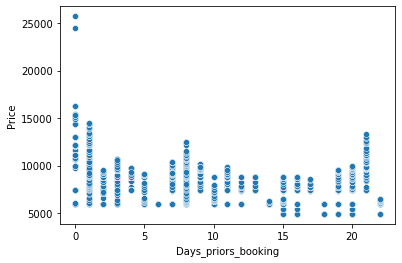

In [309]:
#Lets check this column againt our target variable
sns.scatterplot(x = 'Days_priors_booking', y ='Price' , data  = df)
plt.show()

Yes, booking prior can save some money

## 6. Is Indigo cheaper than Jet Airways? 

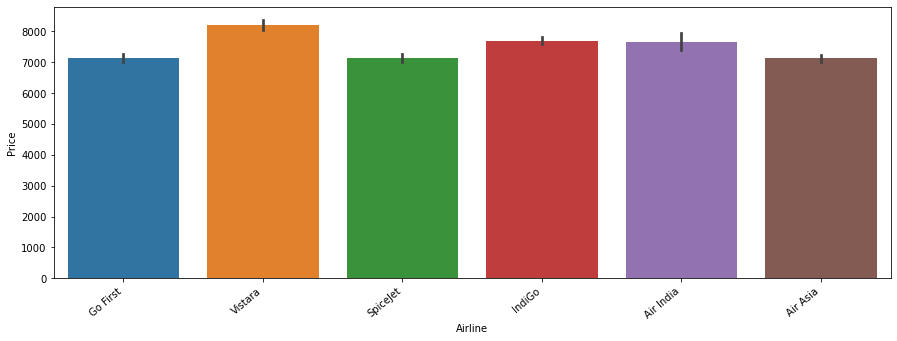

In [311]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Airline'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

No,indifo flights are not cheaper than spicejet

## 7. Are morning flights expensive?

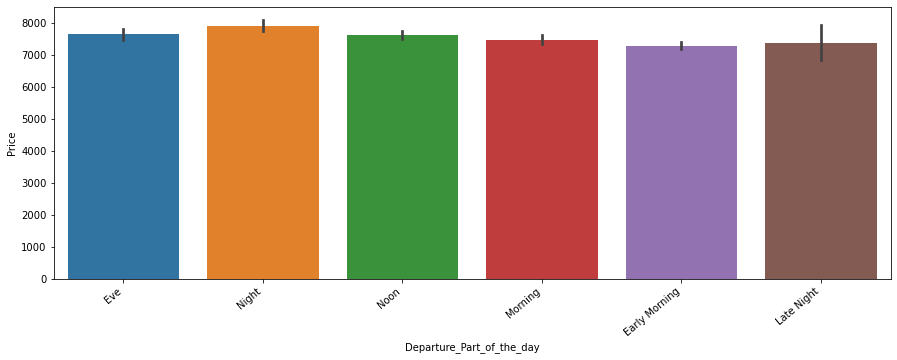

In [312]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['Departure_Part_of_the_day'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

No, Compared to morning flights night flights are expensive

## Encoding the Object Columns

In [313]:
df.columns

Index(['Airline', 'Source City', 'Destination City', 'Stops', 'Price',
       'Duration_in_Minutes', 'Next_day_Arrival', 'Departure_Part_of_the_day',
       'Arrival_Part_of_the_day', 'Day', 'Days_priors_booking'],
      dtype='object')

In [314]:
#we need convert the above columns one-hot encoder, since they are not ordinal values
#and also columns contains more than 2 unique values

one_hot_columns = ['Airline', 'Destination City','Source City','Stops', 'Departure_Part_of_the_day',
       'Arrival_Part_of_the_day',"Day","Next_day_Arrival"]
df_new = pd.get_dummies(data = df,columns=one_hot_columns)

In [315]:
df_new.shape

(2736, 39)

In [316]:
df_new.head()

,Price,Duration_in_Minutes,Days_priors_booking,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Destination City_Bangalore,...,Arrival_Part_of_the_day_Noon,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Next_day_Arrival_No,Next_day_Arrival_Yes
0,7424.0,155.0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,7424.0,540.0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,7425.0,160.0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,7425.0,165.0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,7425.0,165.0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


## Scaling the Data

In [317]:
#lets split our x and y column before scaling
#x and y spitting
Y = df_new['Price']
X = df_new.drop('Price',axis = 1)

In [318]:
X.shape

(2736, 38)

In [319]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
scaled_X.head()

,Duration_in_Minutes,Days_priors_booking,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Destination City_Bangalore,Destination City_Kolkata,...,Arrival_Part_of_the_day_Noon,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Next_day_Arrival_No,Next_day_Arrival_Yes
0,-0.843953,-1.568236,-0.397304,-0.327481,2.368268,-0.638852,-0.372895,-0.505591,2.138294,-0.829993,...,-0.456597,-0.324049,-0.407726,2.486182,-0.51583,-0.42285,-0.36715,-0.407726,0.602685,-0.602685
1,0.251107,-1.568236,-0.397304,-0.327481,2.368268,-0.638852,-0.372895,-0.505591,2.138294,-0.829993,...,-0.456597,-0.324049,-0.407726,2.486182,-0.51583,-0.42285,-0.36715,-0.407726,-1.659243,1.659243
2,-0.829732,-1.568236,-0.397304,-0.327481,-0.422249,-0.638852,-0.372895,1.977885,2.138294,-0.829993,...,-0.456597,-0.324049,-0.407726,2.486182,-0.51583,-0.42285,-0.36715,-0.407726,0.602685,-0.602685
3,-0.815510,-1.568236,-0.397304,-0.327481,-0.422249,-0.638852,2.681719,-0.505591,2.138294,-0.829993,...,-0.456597,-0.324049,-0.407726,2.486182,-0.51583,-0.42285,-0.36715,-0.407726,-1.659243,1.659243
4,-0.815510,-1.568236,-0.397304,-0.327481,-0.422249,1.565308,-0.372895,-0.505591,2.138294,-0.829993,...,-0.456597,-0.324049,-0.407726,2.486182,-0.51583,-0.42285,-0.36715,-0.407726,-1.659243,1.659243


In [320]:
#now our data is scaled using standard scaler

## PCA (Principal Component Analysis):

In [321]:
#we need to use pca becuase we have 38 columns in this dataset which is very high

In [322]:
#we should always use scaled data for performing the PCA

In [323]:
#we have 38 columns excluding target variable
scaled_X.shape

(2736, 38)

In [324]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [325]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score  

array([ 13.9110257 ,  21.22501012,  27.38154258,  32.37146461,
        36.90307598,  41.12942215,  44.96856722,  48.65790217,
        52.20240262,  55.68449228,  59.08558924,  62.34113421,
        65.5776048 ,  68.69247465,  71.69352618,  74.60409788,
        77.46884085,  80.29888357,  82.89520882,  85.43107564,
        87.87185652,  90.20151636,  92.44450664,  94.38621601,
        96.18811532,  97.82334882,  99.09907311,  99.93254055,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

In [326]:
#lets check how many columns gives 90% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 21


In [327]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 24


In [328]:
#now we have seen that how much data will be lost based number of columns

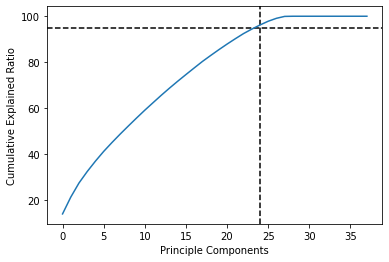

In [329]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 95, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

#### From the above plot we can see that for 24 columns 95% of data will be retrived

In [330]:
#lets perform the PCA with 24 columns
Final_pca = PCA(n_components= 24)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [331]:
#lets create a datafram
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-2.192699,1.542127,0.727769,-2.496979,1.338686,0.723316,-1.474492,1.270844,1.010455,-0.540409,...,-1.459449,0.874077,-0.534552,2.073329,0.236418,-0.394547,0.677808,-0.383034,0.387858,-0.829691
1,1.710344,3.532091,2.497619,0.051616,-0.892095,1.341630,-2.487105,0.317311,0.209989,0.186169,...,-0.441832,1.043617,-1.098489,1.620898,0.259781,-1.686612,0.475731,-0.162152,1.071892,0.004325
2,-2.039885,1.491920,0.340745,-2.557698,2.730830,0.629881,-0.537674,-0.304348,1.498850,-0.993167,...,-1.114263,0.981062,-0.127441,0.415369,-0.112957,-0.411257,0.925576,-0.954000,0.960289,-0.061264
3,0.400537,4.516666,0.438774,-1.035521,-2.035293,2.675528,0.844856,-0.338830,-0.897986,-1.108597,...,-0.587428,-0.072093,0.636558,1.706523,0.179930,-0.149573,0.486078,-1.196597,0.511880,-0.417969
4,0.194496,3.846113,0.413998,-1.932449,-2.405350,3.145442,0.849181,0.090864,-0.448487,-1.290305,...,-0.591733,1.338267,-0.074845,0.840499,0.280825,-0.095631,0.678041,-1.033412,-0.672433,-0.038003


In [332]:
print("variance is : {}".format(np.sum(Final_pca.explained_variance_ratio_)))

variance is : 0.9438621600976537


In [333]:
pca_x.shape

(2736, 24)

## Best random state

In [334]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(pca_x,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.7001818627353105 on random state 66


In [335]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 66


In [336]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,Y,test_size=.22,random_state= rand_state )

In [337]:
lrg = LinearRegression()
lrg.fit(x_train,y_train)
pr =lrg.predict(x_test)
print("r2_score of linear refression is :", r2_score(y_test,pr))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score of linear refression is : 0.7001818627353105
Error :
mean absolute error : 1670.636530491145
mean squared error :  4381786.980240205
root mean squared error : 2093.271836202887


## Model selection :

In [338]:
#lets Choose r2 score of below four Models
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [339]:
#checking each model with Cross val score
model_list = [dtc,knn,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,pca_x,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.abs(r2_score(y_test,pred) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



DecisionTreeRegressor()
Scores :
r2 score: 0.5334399555510634
Cross Val score : -2.742486354477646
Error :
mean absolute error : 485.2392026578073
mean squared error :  1221777.900332226
root mean squared error : 1105.3406263827571
Difference :
Diffrence between cross val score and r2 score is : 3.28


KNeighborsRegressor()
Scores :
r2 score: 0.6614383136547161
Cross Val score : -1.9985665498876681
Error :
mean absolute error : 555.2803986710963
mean squared error :  886589.3922923588
root mean squared error : 941.5887596463537
Difference :
Diffrence between cross val score and r2 score is : 2.66


RandomForestRegressor()
Scores :
r2 score: 0.7702077468917813
Cross Val score : -1.2168980578270705
Error :
mean absolute error : 442.6193258582503
mean squared error :  601755.5507711259
root mean squared error : 775.7290446870776
Difference :
Diffrence between cross val score and r2 score is : 1.99


AdaBoostRegressor()
Scores :
r2 score: 0.36531936226646056
Cross Val score : -7.33685052

## Linear Regression giving the best Score of 70%

## Hyperparameter Tuning:

In [340]:
#lets use parameters of linear regression
parameters = {'fit_intercept' : [True,False],'normalize':[True,False],'copy_X':[True,False],'positive':[True,False]}

gsvrf = GridSearchCV(lrg, parameters, cv=5,scoring="r2")
gsvrf.fit(x_train,y_train)
print(gsvrf.best_score_)
print(gsvrf.best_params_)

0.5506385764768732
{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': False}


## Creating a Final Model as Linear Regressor

In [341]:
lrg = LinearRegression(fit_intercept= True,normalize= True,copy_X=True,positive= False)
lrg.fit(x_train,y_train)
pr =lrg.predict(x_test)
print("r2_score of linear refression is :", r2_score(y_test,pr))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score of linear refression is : 0.7001818627353105
Error :
mean absolute error : 1110.39027920876
mean squared error :  1662034.257278692
root mean squared error : 1289.1990758911875


## Saving the model:

In [342]:
#serialization using joblib
import joblib
joblib.dump(lrg,'Flight_Price_Prediction.obj')

['Flight_Price_Prediction.obj']

In [343]:
Flight_Price = joblib.load('Flight_Price_Prediction.obj')

In [344]:
s_pred = Flight_Price.predict(x_test)

In [345]:
r2_score(y_test,s_pred)

0.7001818627353105

our r2_score is 70.18% percent

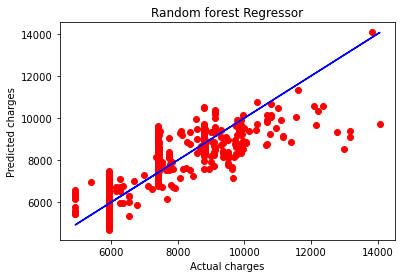

In [346]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = s_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Random forest Regressor')
plt.show()

we can see that values are very close to the line

## Conclusion

In [347]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Flight_Price.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
Predicted,6462.494258,6529.829707,6159.208977,7773.644068,5550.990333,9715.286529,6782.154031,9161.34193,8382.196395,5953.245674,...,5480.222974,5292.745223,8080.594537,7781.979202,6708.141465,9220.62811,6341.6919,10195.635693,8258.361104,6845.516572
Actual,5955.000000,6165.000000,5954.000000,9514.000000,5954.000000,8794.000000,5955.000000,8794.00000,7741.000000,5954.000000,...,5955.000000,5954.000000,9513.000000,7530.000000,5955.000000,9933.00000,5954.0000,9109.000000,7412.000000,7425.000000


70% of Our answers are correct, and the model is also not overfitted